In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("dataset_6000.csv")

In [11]:
X = df.iloc[:, 3:]
Y = df.iloc[:, 2]

0        365000.0
1        865000.0
2       1038000.0
3       1490000.0
4        711000.0
          ...    
5995     497500.0
5996     174000.0
5997     255000.0
5998     780000.0
5999     301000.0
Name: price, Length: 6000, dtype: float64


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [13]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

In [17]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [18]:
def cost_function(x,y,w,b):

    m = x.shape[0]
    total_cost = 0

    for i in range(m):

        f_wb = np.dot(w, x[i]) + b

        total_cost += (f_wb - y[i]) ** 2
    
    total_cost /= 2*m

    return total_cost

In [19]:
def compute_gradient(x,y,w,b):

    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):

        err = (np.dot(w,x[i]) + b) - y[i]

        for j in range(n):

            dj_dw[j] += err * x[i,j]

        dj_db += err
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [20]:
def gradient_descent(x, y, w_in, b_in, alpha, epoch, j_hist):

    j_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(epoch):

        dj_dw, dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i < 100000:
            j_hist.append(cost_function(x,y,w,b))

            if i % 100 == 0:

                print(f"Iteration: {i}, Cost: {j_hist[-1]:8.4f}")
    
    return w,b,j_hist

In [24]:
w_initial = np.zeros(x_train.shape[1])
b_initial = 0
alpha = 0.1
epoch = 10000
j_hist = []

w,b,j_hist = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, epoch, j_hist)

Iteration: 0, Cost: 169477988518.1315
Iteration: 100, Cost: 65837635333.4665
Iteration: 200, Cost: 62734803561.1002
Iteration: 300, Cost: 59943360316.9419
Iteration: 400, Cost: 57431886324.2586
Iteration: 500, Cost: 55172136201.7347
Iteration: 600, Cost: 53138717131.2324
Iteration: 700, Cost: 51308800718.2798
Iteration: 800, Cost: 49661863958.6846
Iteration: 900, Cost: 48179456371.1356
Iteration: 1000, Cost: 46844990652.6462
Iteration: 1100, Cost: 45643554480.6810
Iteration: 1200, Cost: 44561741325.8557
Iteration: 1300, Cost: 43587498354.8563
Iteration: 1400, Cost: 42709989697.2191
Iteration: 1500, Cost: 41919473524.0044
Iteration: 1600, Cost: 41207191543.1517
Iteration: 1700, Cost: 40565269657.2644
Iteration: 1800, Cost: 39986628656.2463
Iteration: 1900, Cost: 39464903931.1339
Iteration: 2000, Cost: 38994373297.8468
Iteration: 2100, Cost: 38569892111.6436
Iteration: 2200, Cost: 38186834935.8150
Iteration: 2300, Cost: 37841043102.5414
Iteration: 2400, Cost: 37528777570.7252
Iteration: 

In [21]:
def compute_output(x,w,b):

    m = x.shape[0]

    f_wb = np.zeros(m)

    for i in range(m):
        
        f_wb[i] = np.dot(w,x[i]) + b
    
    return f_wb

In [26]:
f_wb = compute_output(x_test, w, b)

for i in range(x_test.shape[0]):

    print(f"Prediction: {f_wb[i]:0.4f}, Actual Value: {y_test[i]:0.4f}")

Prediction: 352912.7262, Actual Value: 275900.0000
Prediction: 587760.7246, Actual Value: 579000.0000
Prediction: 348622.3875, Actual Value: 580000.0000
Prediction: 592235.9510, Actual Value: 437500.0000
Prediction: 618930.7979, Actual Value: 375000.0000
Prediction: 274454.2448, Actual Value: 210000.0000
Prediction: 402748.2272, Actual Value: 345000.0000
Prediction: 558260.7974, Actual Value: 699950.0000
Prediction: 319460.6522, Actual Value: 323000.0000
Prediction: 184548.6201, Actual Value: 181000.0000
Prediction: 524871.9498, Actual Value: 800000.0000
Prediction: 547787.0961, Actual Value: 625000.0000
Prediction: 507127.9736, Actual Value: 500000.0000
Prediction: 264382.2412, Actual Value: 405000.0000
Prediction: 418842.5081, Actual Value: 502000.0000
Prediction: 649625.6608, Actual Value: 320000.0000
Prediction: 406620.1604, Actual Value: 345000.0000
Prediction: 205379.6306, Actual Value: 235000.0000
Prediction: 390129.3305, Actual Value: 405000.0000
Prediction: 227316.5650, Actual

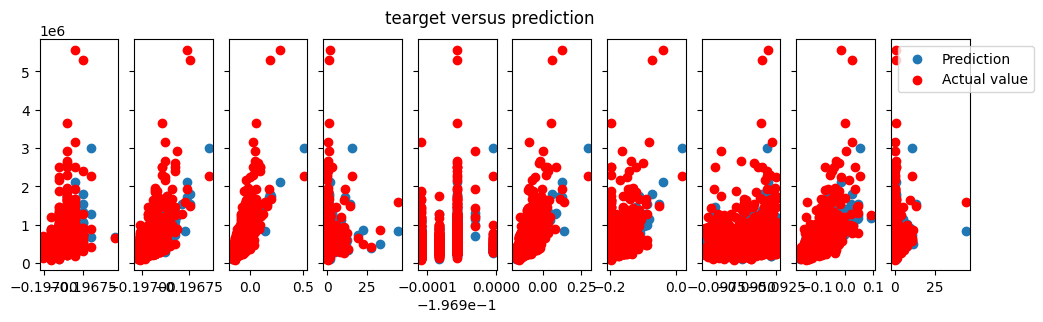

In [40]:
fig, ax = plt.subplots(1, x_test.shape[1], figsize=(12,3), sharey=True)

for i in range(len(ax)):

    ax[i].scatter(x_test[:, i], f_wb, label = "Prediction")
    ax[i].scatter(x_test[: ,i], y_test, color='r', label = 'Actual value')

fig.suptitle("tearget versus prediction")
plt.legend()
plt.show()